# Training a neuron to compute AND function

Let us extend the neuron created in the previous section to compute an AND function. It now takes two inputs and tries to compute the following truth table:-

|inp1 | inp2 | out |
|-|
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

Since there are two inputs, we require two weights to compute the output:-

$$ a = \sigma(w_1x_1+w_2x_2+b)$$

Extending the formula from the previous section:-

$$\frac{\partial C}{\partial w_1} = \frac{1}{n}\Sigma(a-e) * a * (1-a) * x_1$$

$$\frac{\partial C}{\partial w_2} = \frac{1}{n}\Sigma(a-e) * a * (1-a) * x_2$$

$$\frac{\partial C}{\partial b} = \frac{1}{n}\Sigma(a-e) * a * (1-a)$$

Let us repeat the same process as before:-

## Initialization

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1.0/(1+np.exp(-z))

inp = [[0, 0], [0, 1], [1, 0], [1, 1]]
outp = [0, 0, 0, 1]

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

Again, let us compute the AND function using the initial parameters.

Weight1: -0.182555918702; Weight2: 2.7159368593; Bias: -1.02242982996
Input1 = 0; Input2 = 0; Output = 0.26455436942; Expected = 0; Error = 0.26455436942
Input1 = 0; Input2 = 1; Output = 0.844684811777; Expected = 0; Error = 0.844684811777
Input1 = 1; Input2 = 0; Output = 0.230589467205; Expected = 0; Error = 0.230589467205
Input1 = 1; Input2 = 1; Output = 0.819202118621; Expected = 1; Error = -0.180797881379
Cost = 0.217335205481


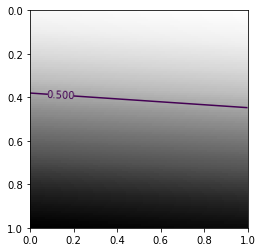

In [13]:
def print_error(w1, w2, b):
    print "Weight1: {0}; Weight2: {1}; Bias: {2}".format(w1, w2, b)
    
    error = 0
    
    for i in range(4):
        x1,x2 = inp[i]
        e = outp[i]
        a = sigmoid(w1*x1 + w2*x2 + b)
    
        err = a-e
    
        print "Input1 = {0}; Input2 = {1}; Output = {2}; Expected = {3}; Error = {4}".format(x1, x2, a, e, err)
    
        error += err**2
    
    error /= 4

    print "Cost = {0}".format(error)
    
    x1 = np.arange(0, 1, 0.01)
    x2 = np.arange(0, 1, 0.01)
    X1, X2 = np.meshgrid(x1, x2)
    Z = sigmoid(w1*X1 + w2*X2 + b)
    im = plt.imshow(Z, cmap=plt.cm.Greys, extent=(0, 1, 1, 0))
    cset = plt.contour(Z, np.array([0.5]), extent=(0,1,0,1))
    plt.clabel(cset)
    plt.show()
    
print_error(w1, w2, b)

Let us perform gradient descent:-

Del_w1 = 0.00353318460474; Del_w2 = 0.0210095589234; Del_b = 0.0441055161219
New weight1 = -0.186089103307; New weight2 = 2.69492730037; New bias = -1.06653534608
Weight1: -0.186089103307; Weight2: 2.69492730037; Bias: -1.06653534608
Input1 = 0; Input2 = 0; Output = 0.256062523724; Expected = 0; Error = 0.256062523724
Input1 = 0; Input2 = 1; Output = 0.835949233539; Expected = 0; Error = 0.835949233539
Input1 = 1; Input2 = 0; Output = 0.222246164717; Expected = 0; Error = 0.222246164717
Input1 = 1; Input2 = 1; Output = 0.808811007818; Expected = 1; Error = -0.191188992182
Cost = 0.212581431393


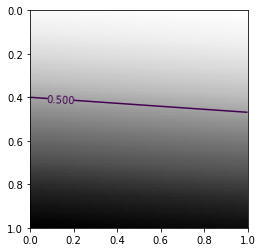

In [14]:
def improve_parameters(w1, w2, b):
    del_w1 = 0
    del_w2 = 0
    del_b = 0
    error = 0
    
    for i in range(4):
        x1,x2 = inp[i]
        e = outp[i]
        a = sigmoid(w1*x1 + w2*x2 + b)
    
        del_w1 += (a-e) * a * (1-a) * x1
        del_w2 += (a-e) * a * (1-a) * x2
        del_b += (a-e) * a * (1-a)
        error += (a-e)**2/2

    del_w1 /= 4
    del_w2 /= 4
    del_b /= 4
    error /= 4
    
    return (del_w1, del_w2, del_b, error)

del_w1, del_w2, del_b, error = improve_parameters(w1, w2, b)
w1 -= del_w1
w2 -= del_w2
b -= del_b
print "Del_w1 = {0}; Del_w2 = {1}; Del_b = {2}".format(del_w1, del_w2, del_b)
print "New weight1 = {0}; New weight2 = {1}; New bias = {2}".format(w1, w2, b)

print_error(w1, w2, b)

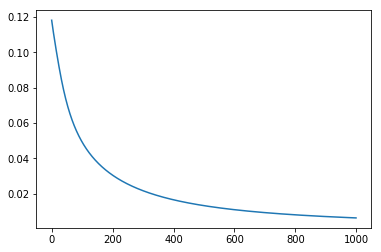

Weight1: 3.76433404732; Weight2: 3.76432339458; Bias: -5.7519265539
Input1 = 0; Input2 = 0; Output = 0.00316659571876; Expected = 0; Error = 0.00316659571876
Input1 = 0; Input2 = 1; Output = 0.120510667473; Expected = 0; Error = 0.120510667473
Input1 = 1; Input2 = 0; Output = 0.120511796539; Expected = 0; Error = 0.120511796539
Input1 = 1; Input2 = 1; Output = 0.855292727233; Expected = 1; Error = -0.144707272767
Cost = 0.01249903405


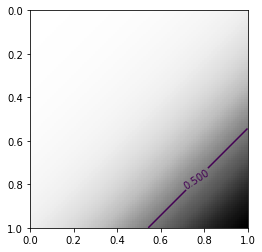

In [11]:
errors = []

for i in range(1000):
    del_w1, del_w2, del_b, error = improve_parameters(w1, w2,b)
    
    w1 -= del_w1
    w2 -= del_w2
    b -= del_b
    
    errors.append(error)
    
plt.plot(errors)
plt.show()

print_error(w1, w2, b)